# Scikit-Learn
## Chapter 4
### Predictive Analytics for the Modern Enterprise 

This is jupyter notebook that can be used to follow along the code examples for Chapter 4 Section 3 - Sciket learn of the book. The code examples go through some of the functionality that can be used to work with the sci-kit learn library in Python to train, test and use predictive models. 

The notebook has been tested using the following pre-requisite:

Python V3.9.13 - https://www.python.org/
Anaconda Navigator V3 for Python 3.9 - https://www.anaconda.com/
Jupyter - V6.4.12 - https://jupyter.org/
Desktop computer - macOS Ventura V13.1

Documentation referece for Scikit Learn: https://scikit-learn.org/stable/

### Pre-requisites


You will need to install the scikit-learn package in your envionrment. 
In your environment run the following command

```bash
conda install -c conda-forge scikit-learn
```
OR
```bash
pip install -U scikit-learn
```

### Training and predicting with a Linear Regression Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import model_selection, metrics #To perform model cross validation and scoring
from sklearn.linear_model     import LinearRegression # To use Linear Regression Models
from sklearn.model_selection  import train_test_split # To split data in to training and testing sets


In [2]:
%matplotlib inline

Provide data from the Palmer Archipelago (Antarctica) penguin dataset.

License: CC0

* Sourced from https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

* Raw data used: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

This module contains one pandas Dataframe: data.

In [7]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv" 
penguins = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
penguins.dropna(subset=['body_mass_g'], inplace=True) #Clean empty fields before training 
penguins.dropna(subset=['sex'], inplace=True) #Clean empty fields before training 
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [8]:
penguins_training_data, penguins_testing_data = train_test_split(penguins, train_size=0.75, random_state=110) #Split the data

penguins_training_data = penguins_training_data.copy() #Create a copy of the data instead of referencing
penguins_testing_data = penguins_testing_data.copy() #Create a copy of the data instead of referencing


In [9]:
l_regression = LinearRegression() # Initialize the model

In [10]:
#predictors = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
predictors = ['flipper_length_mm'] #Independent varaible
predicted = 'body_mass_g' #dependent varaiable

In [12]:
l_regression.fit(penguins_training_data[predictors], penguins_training_data[predicted]) # Training the model

LinearRegression()

In [13]:
predictions_bm = l_regression.predict(penguins_testing_data[predictors]) #predictions on the test data
print(predictions_bm)

[3398.48233545 3905.21622455 4665.31705819 4209.256558   4817.33722492
 3145.11539091 3550.50250218 5678.78483638 4057.23639128 4766.66383601
 3753.19605782 5121.37755837 4006.56300237 3347.80894655 3499.82911327
 3702.52266891 4969.35739164 4614.64366928 5577.43805856 3499.82911327
 3854.54283564 5374.74450292 4563.97028037 3398.48233545 3803.86944673
 3145.11539091 3651.84928    5222.72433619 3905.21622455 3195.78877982
 4969.35739164 3803.86944673 3601.17589109 4868.01061383 5020.03078055
 5020.03078055 4259.92994691 3702.52266891 5172.05094728 3955.88961346
 4918.68400274 3347.80894655 3651.84928    4918.68400274 3651.84928
 4563.97028037 5172.05094728 4817.33722492 5020.03078055 4006.56300237
 2942.42183527 4107.90978019 4006.56300237 3601.17589109 4259.92994691
 3449.15572436 3753.19605782 3803.86944673 3854.54283564 3702.52266891
 3651.84928    3753.19605782 2739.72827963 4918.68400274 4107.90978019
 3955.88961346 3702.52266891 3955.88961346 3550.50250218 4868.01061383
 4057.236

In [14]:
actual_bm = penguins_testing_data['body_mass_g'] #Actual Body Mass values from the test data
print(actual_bm)

164    3700.0
61     4400.0
326    4700.0
183    4300.0
268    5100.0
        ...  
111    4600.0
315    5200.0
264    5550.0
46     3425.0
119    3325.0
Name: body_mass_g, Length: 84, dtype: float64


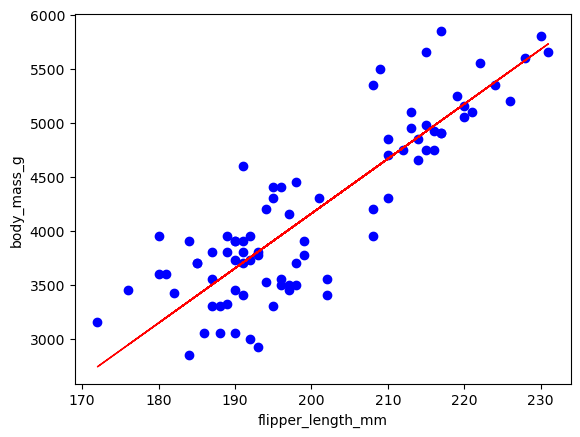

In [16]:
plt.scatter(penguins_testing_data[predictors], penguins_testing_data[predicted], color="blue") # Plot the testing data (body mass vs flipper length)
plt.plot(penguins_testing_data[predictors], predictions_bm, color="red", linewidth=1) # Plot the predicted values using the predictions as the fitted line

plt.xlabel("flipper_length_mm") #Label the X axis
plt.ylabel("body_mass_g") #Label the Y axis

plt.show()

In [17]:
l_regression.score(penguins_testing_data[predictors], penguins_testing_data[[predicted]]) #Scoring the model on Testing Data

0.7328658873549915

In [18]:
l_regression.score(penguins_training_data[predictors], penguins_training_data[[predicted]]) #Scoring the model on Training Data 

0.7709020371312678

In [19]:
el_regression = LinearRegression()  #Empty linear regression model
splits = model_selection.KFold(n_splits=10) #We want to split the data 10 ways

In [20]:
cross_validate = model_selection.cross_val_score(el_regression, penguins[predictors], penguins[predicted], 
                                             cv=splits, 
                                             scoring='neg_root_mean_squared_error', 
                                             n_jobs=-1) 
print(cross_validate) # neg mean sq error for each train / test split

[-487.26692248 -440.25298463 -395.66019633 -437.66690956 -325.38121202
 -421.35199215 -478.6979478  -358.50691586 -286.60244958 -345.84454605]


In [21]:
cross_validate = model_selection.cross_val_score(el_regression, penguins[predictors], penguins[predicted], 
                                             cv=splits, 
                                             scoring='r2', 
                                             n_jobs=-1) 
print(cross_validate) # R-squared for each train / test split

[-0.63451635  0.26538173  0.2523206   0.17600106 -0.11513909  0.20677232
  0.66326511  0.44046001  0.67041167  0.33949315]


### Using a Random Forest Classifier

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
penguins.sex.replace(['MALE', 'FEMALE'], [0,1], inplace=True) #Make sex numeric
penguins.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1,2,3], inplace=True) #Make species numeric

penguins_training_data, penguins_testing_data = train_test_split(penguins, train_size=0.75, random_state=120) #Split data
penguins_training_data = penguins_training_data.copy() #Make a copy of the training data
penguins_testing_data = penguins_testing_data.copy() #Make a copy of the testing data
predictors = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'sex'] #Independent variables(s)
predicted = 'species' #Dependent variable
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,1
2,1,1,40.3,18.0,195.0,3250.0,1
4,1,1,36.7,19.3,193.0,3450.0,1
5,1,1,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,3,2,47.2,13.7,214.0,4925.0,1
340,3,2,46.8,14.3,215.0,4850.0,1
341,3,2,50.4,15.7,222.0,5750.0,0
342,3,2,45.2,14.8,212.0,5200.0,1


In [167]:
rf_classifier = RandomForestClassifier(n_estimators=50) #n_estimators 
rf_classifier.fit(penguins_training_data[predictors], penguins_training_data[predicted]) #Training the RF_classifier

RandomForestClassifier(n_estimators=50)

In [168]:
predictions_sp = rf_classifier.predict(penguins_testing_data[predictors]) #Prediction Stage. Test data set
print(predictions_sp)

[2 1 2 1 3 1 2 1 1 3 1 1 3 1 1 1 2 2 1 2 1 1 2 1 1 3 3 3 2 1 1 1 1 2 1 3 3
 3 2 3 3 3 3 2 1 3 2 3 1 3 1 1 3 3 3 1 2 3 2 1 3 2 3 3 1 3 3 2 1 3 3 1 3 2
 1 3 2 1 3 1 1 3 1 1]


In [169]:
sum(penguins_testing_data['species'] == predictions_sp) #Number of Accurate results

83

In [170]:
# Number incorrect
sum(penguins_testing_data['species'] != predictions_sp) #Number of Inaccurate Results

1

In [171]:
# Accuracy
sum(penguins_testing_data['species'] == predictions_sp) / len(predictions_sp)

0.9880952380952381

In [172]:
predictions_sp = rf_classifier.predict(penguins_training_data[predictors]) #Checking the Training Data
print(predictions_sp)

[3 3 3 3 3 3 1 1 2 1 1 1 1 3 3 3 2 1 1 3 1 3 1 1 3 1 2 1 2 3 2 2 3 2 3 1 1
 3 3 1 1 1 1 2 3 1 1 1 1 3 1 1 1 1 1 1 1 3 3 1 2 1 3 3 3 1 1 1 1 2 2 3 2 2
 3 3 3 3 3 3 1 2 3 1 1 1 1 1 3 1 3 1 3 1 3 3 3 1 3 3 3 2 1 2 1 2 3 3 3 1 1
 1 3 1 3 1 1 3 3 2 3 1 1 1 2 2 2 3 1 1 2 2 3 3 3 3 1 1 2 2 3 1 2 2 3 1 2 3
 3 2 1 3 2 1 1 3 1 2 1 2 1 3 3 2 1 3 1 1 1 3 1 2 1 2 3 2 2 2 1 1 2 1 1 3 3
 1 1 3 3 2 1 3 3 2 1 1 3 1 1 1 3 3 1 2 1 1 1 1 2 1 3 3 1 1 2 2 3 2 1 3 1 3
 3 1 2 1 3 1 2 1 3 1 1 1 3 3 1 1 1 2 3 1 3 1 1 3 2 3 2]


In [173]:
sum(penguins_training_data['species'] != predictions_sp) #Number of Inaccurate results

0

In [174]:
rf_classifier.score(penguins_training_data[predictors], penguins_training_data[[predicted]]) #Scoring on Training Data

1.0

In [175]:
rf_classifier.score(penguins_testing_data[predictors], penguins_testing_data[[predicted]]) #Scoring on Testing Data

0.9880952380952381

### Training a Decision Tree

In [261]:
import pandas as pd

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [262]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv" 
penguins = pd.read_csv(url) #Read the data from the URL in a Pandas dataframe
penguins.dropna(subset=['body_mass_g'], inplace=True) #Clearn the data
penguins.dropna(subset=['sex'], inplace=True) #Clean the data

In [263]:
penguins.sex.replace(['MALE', 'FEMALE'], [0,1], inplace=True) #Make sex numeric
penguins.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1,2,3], inplace=True) #Make species numeric
penguins.island.replace(['Torgersen', 'Biscoe', 'Dream'], [1,2,3], inplace=True) #Make island numeric

In [264]:
predictors = ['species', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g']
predicted = 'sex'
penguins_training_data, penguins_testing_data = train_test_split(penguins, train_size=0.80, random_state=112)

In [265]:
dt_classifier = DecisionTreeClassifier() #Initialize the model
dt_classifier = dt_classifier.fit(penguins_training_data[predictors],penguins_training_data[predicted]) #Train the model

In [296]:
predictions = dt_classifier.predict(penguins_testing_data[predictors]) #Start predicting

In [297]:
print(predictions)

[1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1
 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1]


In [268]:
print(penguins_testing_data[predicted])

92     1
323    0
116    1
148    1
247    0
      ..
252    1
280    1
234    1
167    0
288    1
Name: sex, Length: 67, dtype: int64


In [269]:
sum(y_pred!=penguins_testing_data[predicted])

7

In [270]:
sum(y_pred==penguins_testing_data[predicted])

60

In [271]:
print(dt_classifier.score(penguins_testing_data[predictors], penguins_testing_data[predicted]))

0.8955223880597015


In [272]:
print(dt_classifier.score(penguins_training_data[predictors], penguins_training_data[predicted]))

1.0


Install the followingin your environment

```bash pip3 install graphviz```

```bash pip3 install pydotplus```



In [275]:
import pydotplus

from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

In [278]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

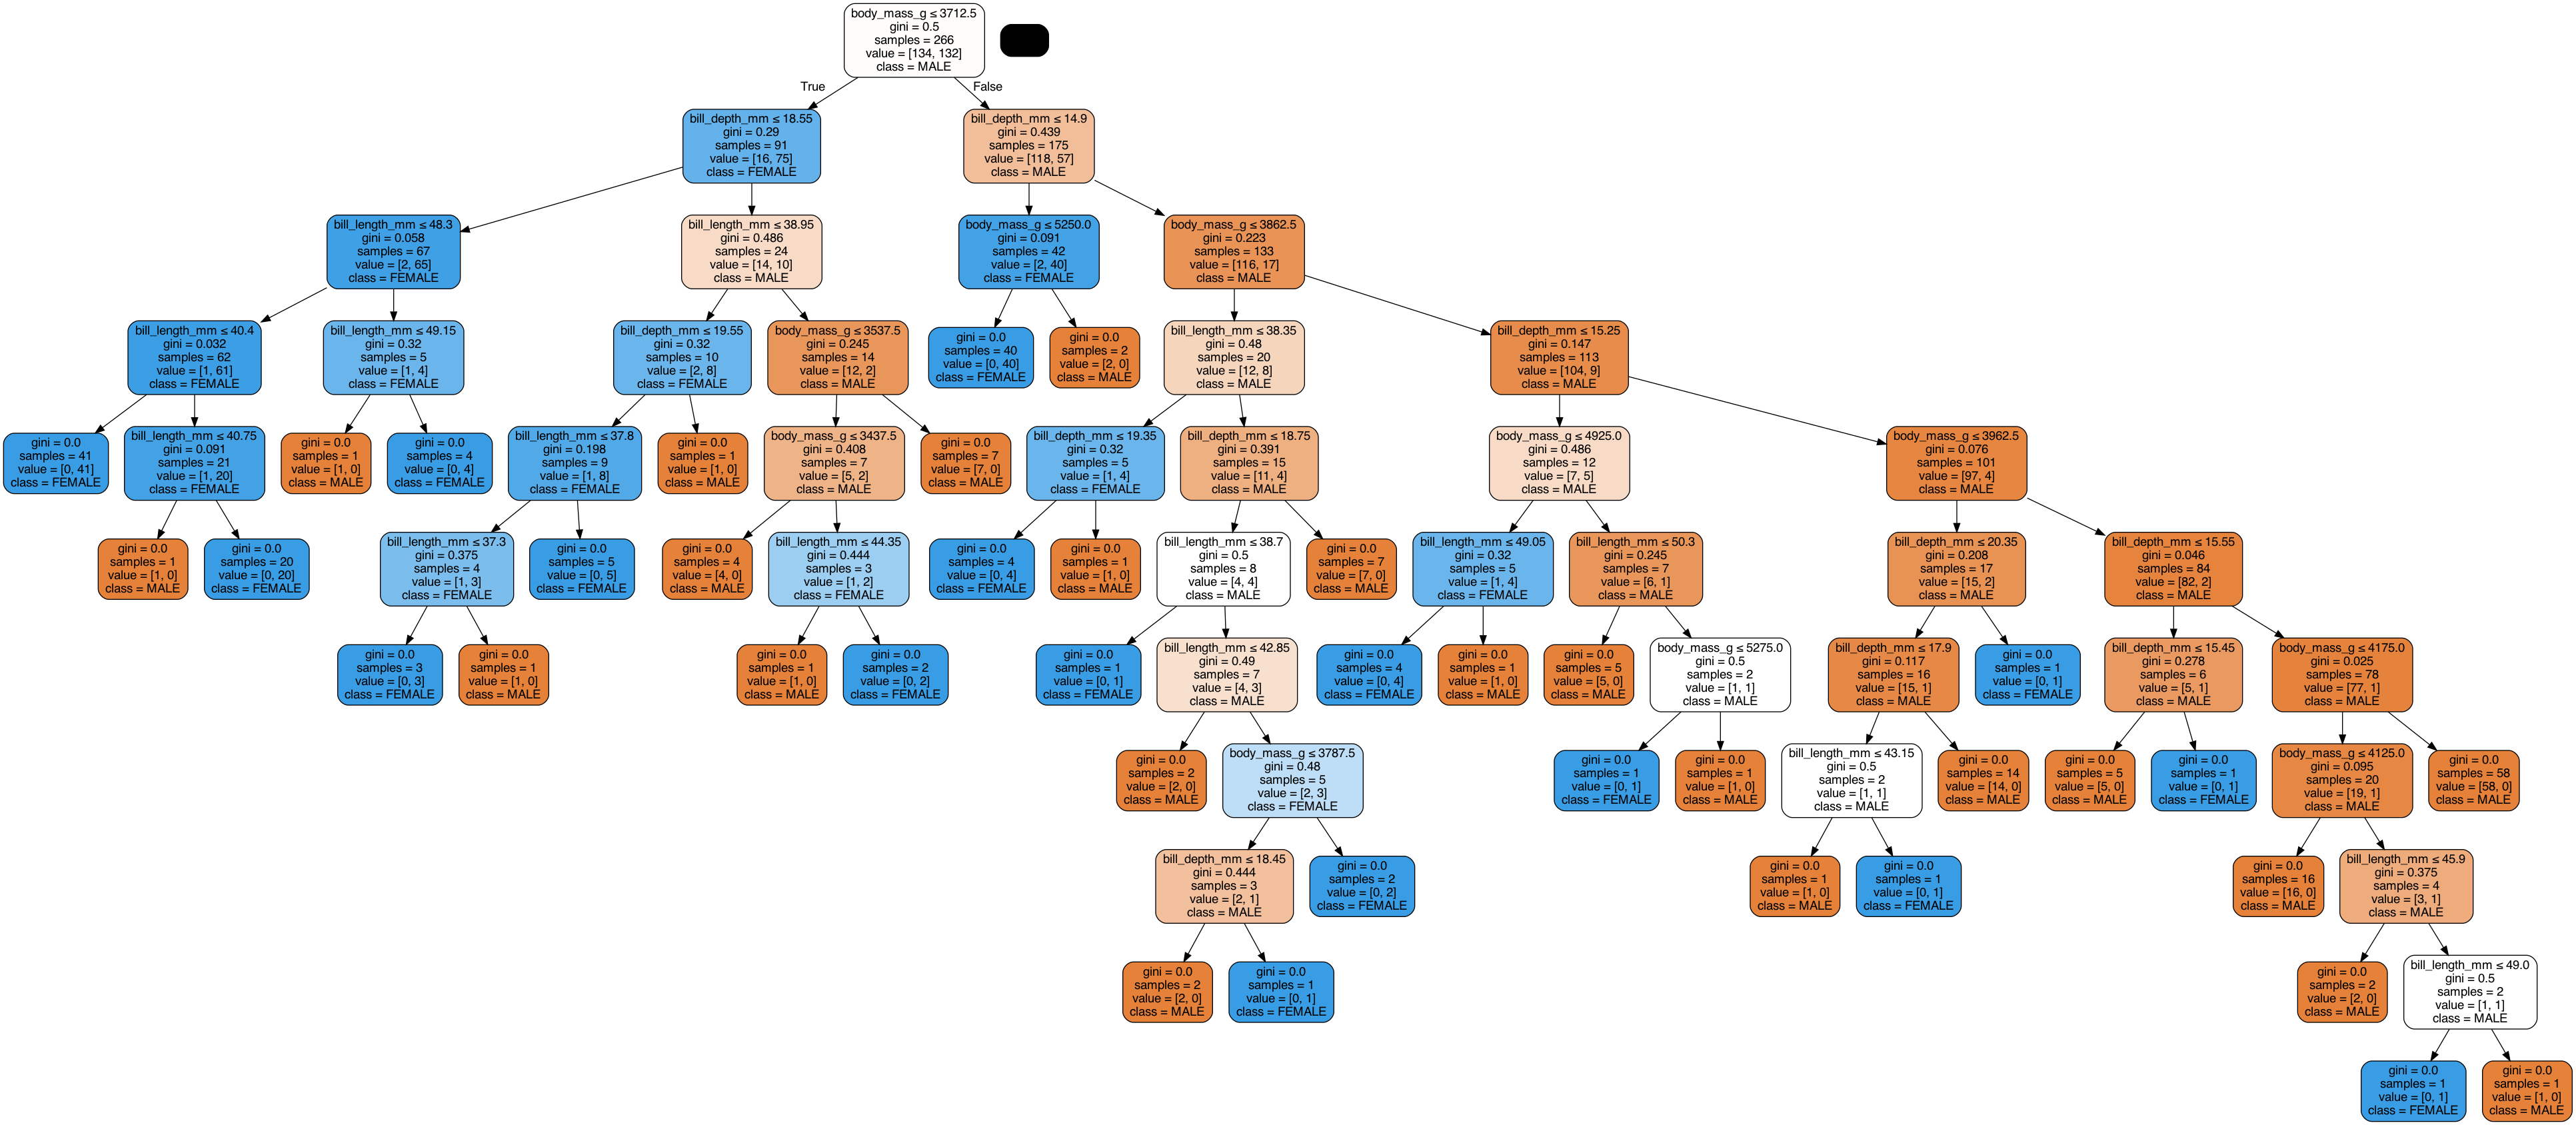

In [285]:
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictors, class_names=['MALE','FEMALE']) #Define the node characteristics
tree = pydotplus.graph_from_dot_data(dot_data.getvalue())   #Create the Tree
tree.write_png('penguins.png') #Export the tree as a image
Image(tree.create_png()) #Print the image

In [294]:
dt_classifier = DecisionTreeClassifier(max_depth=3) #Initialize the Decision Tree with a maximum depth of 3

dt_classifier = dt_classifier.fit(penguins_training_data[predictors],penguins_training_data[predicted]) #Train the model

predictions = dt_classifier.predict(penguins_testing_data[predictors]) #Predict using testing data

print(dt_classifier.score(penguins_testing_data[predictors], penguins_testing_data[predicted])) #Score the new model

0.9253731343283582


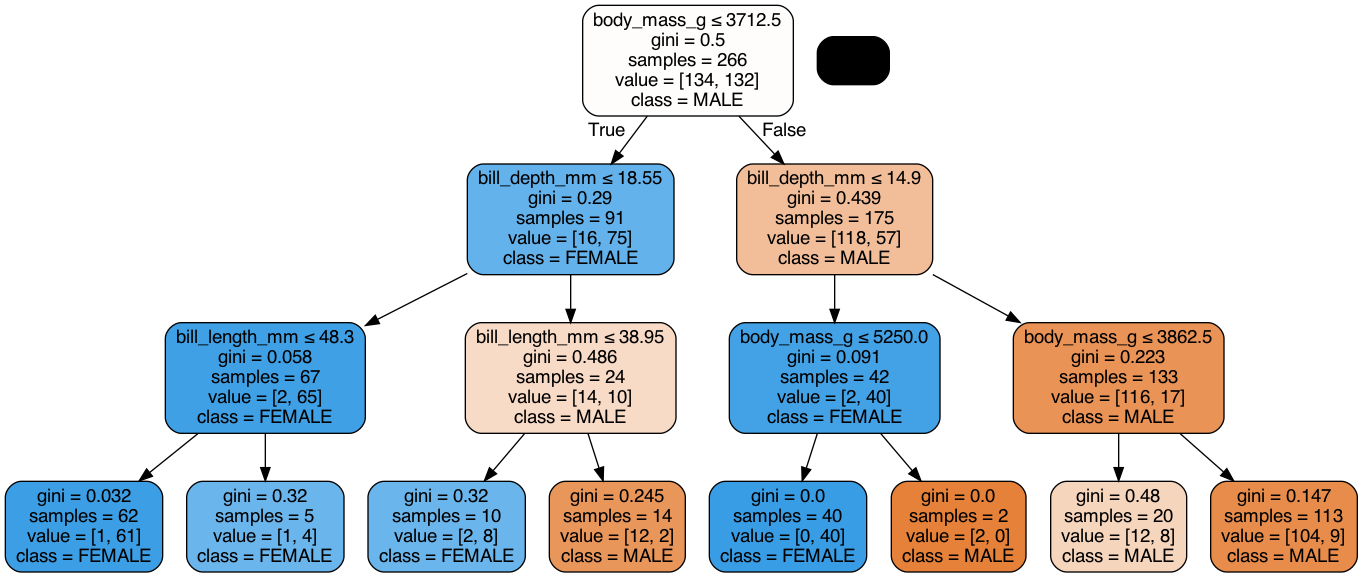

In [295]:
data_file = StringIO()
export_graphviz(dt_classifier, out_file=data_file,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictors,class_names=['MALE','FEMALE'])
graph = pydotplus.graph_from_dot_data(data_file.getvalue())  
graph.write_png('penguins.png')
Image(graph.create_png())